In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect


In [2]:
con_string = f"sqlite:///../Data/Final_Project_DB.db"
engine = create_engine(con_string)
connection = engine.connect()

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)
Base.classes.keys()

['bike_transaction',
 'humidity',
 'pressure',
 'station_location',
 'weather_data',
 'wind_speed']

In [40]:
station_df = Base.classes.station_location
trip_df = Base.classes.bike_transaction
weather_df = Base.classes.weather_data

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [16]:
columns = inspector.get_columns('station_location')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
number VARCHAR(20)
station_name VARCHAR(100)
latitude TEXT(50)
longtitude VARCHAR(50)
total_docks INTEGER


In [17]:
station_location = session.query(
    station_df.id,
    station_df.number,
    station_df.station_name,
    station_df.latitude,
    station_df.longtitude,
    station_df.total_docks,
).all()
session.close()

# Convert query results to DataFrame
station_location = pd.DataFrame(station_location)
station_location.head(5)

,id,number,station_name,latitude,longtitude,total_docks
0,1,30000,100 Main Street SE,44.984892,-93.256551,27
1,2,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,3,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,4,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,5,30004,11th Street & Hennepin,44.97534,-93.27869,23


In [18]:
columns = inspector.get_columns('bike_transaction')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
start_date TEXT
start_time TEXT
start_station_name VARCHAR(100)
start_station_code VARCHAR(10)
end_date TEXT
end_time TEXT
end_station_name VARCHAR(100)
end_station_code VARCHAR(10)
user_type VARCHAR(20)
total_duration INTEGER


In [19]:
trip_hist = session.query(
    trip_df.id,
    trip_df.start_date,
    trip_df.start_time,
    trip_df.start_station_name,
    trip_df.start_station_code,
    trip_df.end_date,
    trip_df.end_time,
    trip_df.end_station_name,
    trip_df.end_station_code,
    trip_df.user_type,
    trip_df.total_duration
).all()

session.close()

# Convert query results to DataFrame
trip_history = pd.DataFrame(trip_hist)
trip_history['start_date'] = pd.to_datetime(trip_history['start_date'])
trip_history['end_date'] = pd.to_datetime(trip_history['end_date'])
trip_history.head(5)


,id,start_date,start_time,start_station_name,start_station_code,end_date,end_time,end_station_name,end_station_code,user_type,total_duration
0,1,2017-11-05,21:45,Hennepin Ave & S Washington Ave,30184,2017-11-05,22:02,Logan Park,30104,Member,1048
1,2,2017-11-05,22:45,Broadway Street N & 4th Street E,30122,2017-11-05,22:26,Broadway Street N & 4th Street E,30122,Member,2513
2,3,2017-11-05,23:45,Dale Street & Grand Ave.,30106,2017-11-05,22:13,N Milton Street & Summit Ave,30101,Member,1817
3,4,2017-11-05,0:45,Weisman Art Museum,30183,2017-11-05,22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
4,5,2017-11-05,1:45,South 2nd Street & 3rd Ave S,30030,2017-11-05,21:44,6th Ave SE & University Ave,30088,Member,370


In [20]:
#test
station_location.sample(n=5)
trip_history.sample(n=5)

,id,start_date,start_time,start_station_name,start_station_code,end_date,end_time,end_station_name,end_station_code,user_type,total_duration
341952,341953,2017-06-08,21:45,2nd Street N & 8th Ave N,30092,2017-06-08,5:36,2nd Ave N & N 6th Street,30053,Member,370
317358,317359,2017-06-18,3:45,Washington Ave SE & Union Street SE,30115,2017-06-18,9:14,4th Street & 13th Ave SE,30009,Member,476
244285,244286,2017-07-12,10:45,15th Ave SE & 4th Street SE,30197,2017-07-12,12:25,23rd Ave SE & 6th Street SE,30031,Member,321
333626,333627,2017-06-11,23:45,Selby Ave & Virginia Street,30137,2017-06-11,2:52,Hague Ave & Dale Street,30103,Member,218
36488,36489,2017-10-06,5:45,Coffman Union,30024,2017-10-06,17:20,6th Ave SE & University Ave,30088,Member,837


In [21]:
#test
station_location = pd.DataFrame(station_location)
trip_history = pd.DataFrame(trip_history)

station_location

,id,number,station_name,latitude,longtitude,total_docks
0,1,30000,100 Main Street SE,44.984892,-93.256551,27
1,2,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,3,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,4,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,5,30004,11th Street & Hennepin,44.97534,-93.27869,23
...,...,...,...,...,...,...
197,198,30201,Elwood Ave N & Oak Park Ave N,44.98716,-93.301944,15
198,199,30202,Mill City Quarter,44.9805,-93.2618,23
199,200,30203,W 50th Street & W Minnehaha Pkwy,44.912125,-93.298552,23
200,201,30204,NE Central Ave & NE 14th Ave,45.002526,-93.247162,15


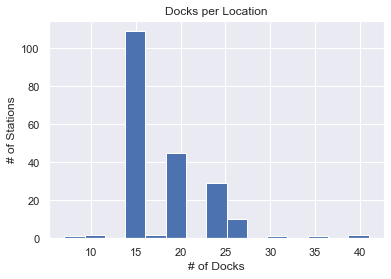

In [23]:
# Num Docks per Location
plt.figure()
plt.hist(station_location['total_docks'], 
         bins=15)
plt.ylabel('# of Stations')
plt.xlabel('# of Docks')
plt.title('Docks per Location')
plt.show()

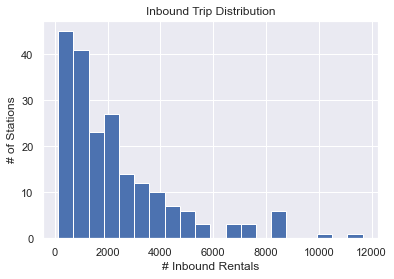

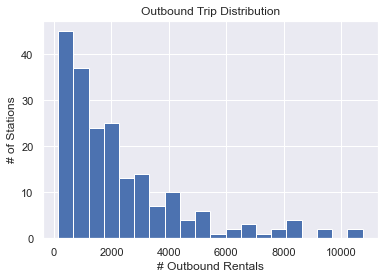

# Outbound Trips: 460718
# Inbound Trips: 460718


In [26]:
demand_df = pd.DataFrame({
    'Inbound trips': trip_history.groupby('end_station_name').size(),
    'Outbound trips': trip_history.groupby('start_station_name').size()
})
demand_df['station_name'] = demand_df.index
sdf = station_location.merge(demand_df, on='station_name')

#inbound graph
plt.figure()
plt.hist(sdf['Inbound trips'], bins=20)
plt.ylabel('# of Stations')
plt.xlabel('# Inbound Rentals')
plt.title('Inbound Trip Distribution')
plt.show()

#outbound graph
plt.figure()
plt.hist(sdf['Outbound trips'], bins=20)
plt.ylabel('# of Stations')
plt.xlabel('# Outbound Rentals')
plt.title('Outbound Trip Distribution')
plt.show()

#confirm equal inbound vs outbound
print('# Outbound Trips: %d'%(sdf['Outbound trips'].sum()))
print('# Inbound Trips: %d'%(sdf['Inbound trips'].sum()))

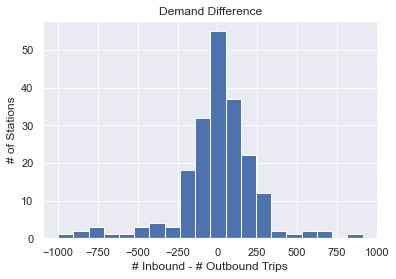

In [27]:
#inbound vs outbound trips
sdf['demand_diff'] = sdf['Inbound trips']-sdf['Outbound trips']

plt.figure()
plt.hist(sdf['demand_diff'], bins=20)
plt.ylabel('# of Stations')
plt.xlabel('# Inbound - # Outbound Trips')
plt.title('Demand Difference')
plt.show()

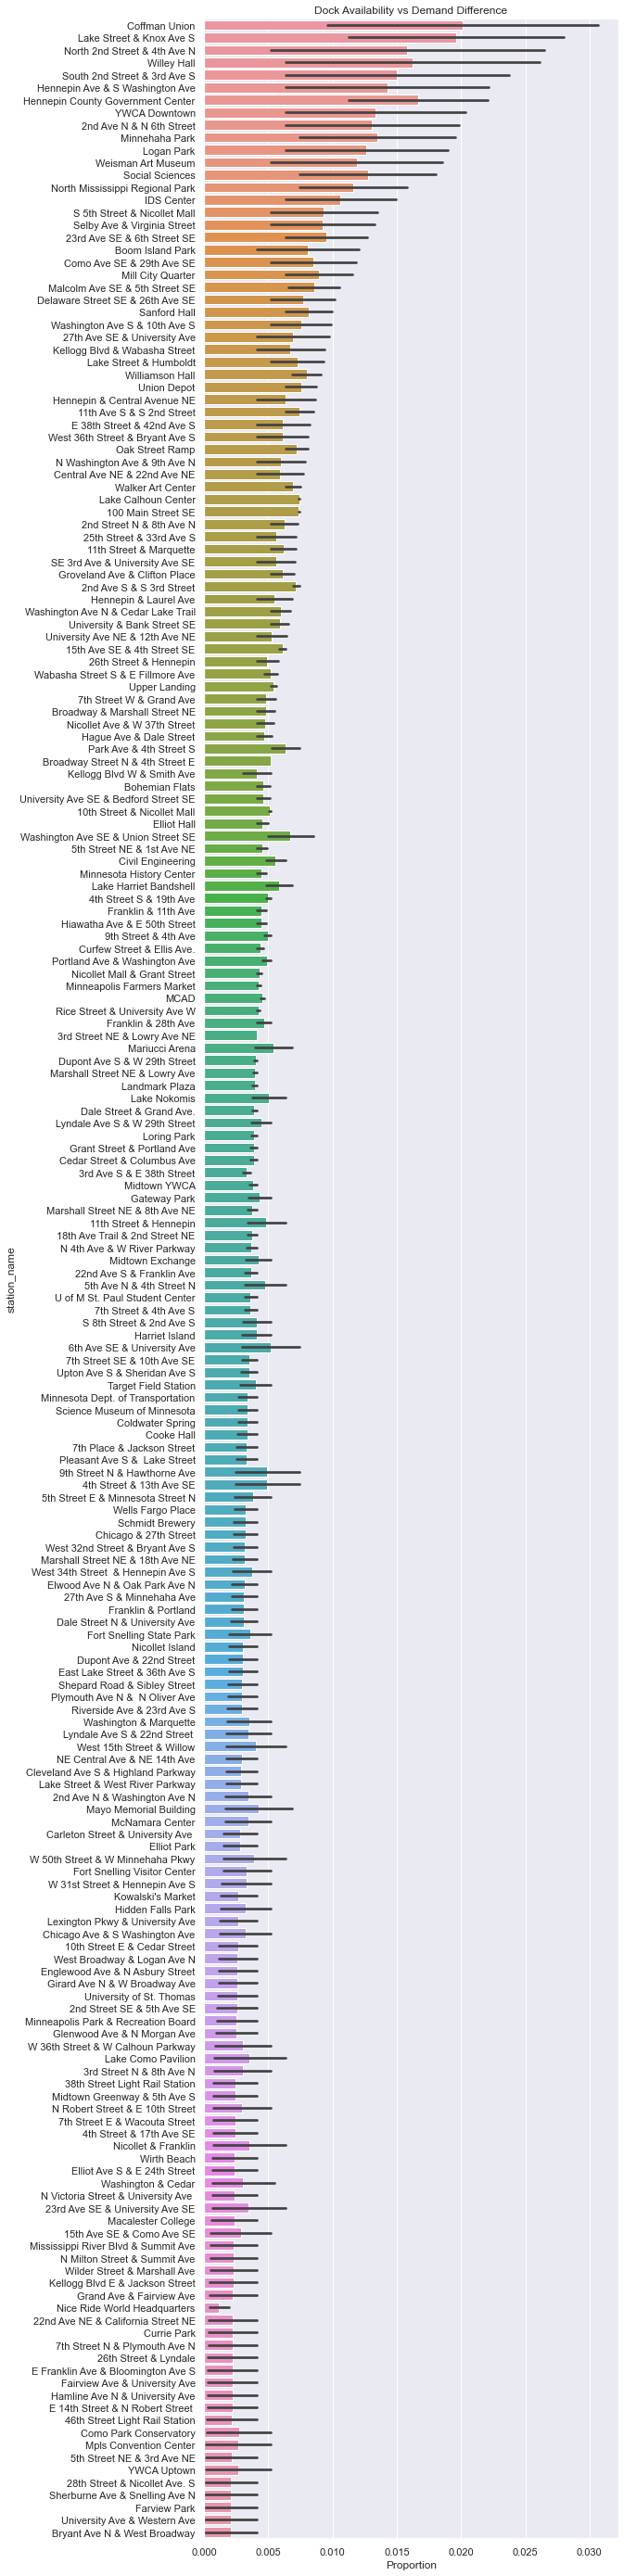

In [32]:
#find abslt value
sdf['abslt_diff'] = sdf['demand_diff'].abs()

#MAYBE DF = df[['id','pred', 'target']].replace(columns={'target':'y'})
#DF['diff'] = (oosDF['pred'] - oosDF['y']).abs()


#dock availability vs demand difference
sdf['Docks'] = sdf['total_docks']/sdf['total_docks'].sum()
sdf['DemandDiff'] = sdf['abslt_diff']/sdf['abslt_diff'].sum()

#?? make seaborn work!
seaborn_data_cleaned = (
    sdf[['station_name', 'Docks', 'DemandDiff']]
       .set_index('station_name')
       .stack()
       .reset_index()
       .rename(columns={'level_1':'Distribution', 0:'Proportion'})
)

#graph
plt.figure(figsize=(8, 50))
station_list = (
    sdf
    .sort_values('DemandDiff', ascending=False)['station_name']
    .tolist()
)

sns.barplot(y='station_name', x='Proportion',data=seaborn_data_cleaned, order=station_list)

plt.title('Dock Availability vs Demand Difference')
sns.color_palette("rocket", as_cmap=True)
plt.show()


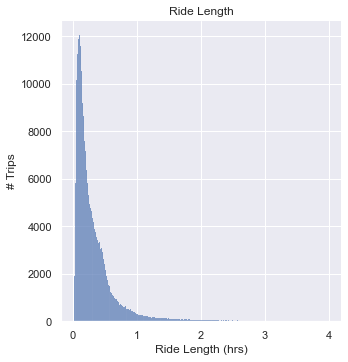

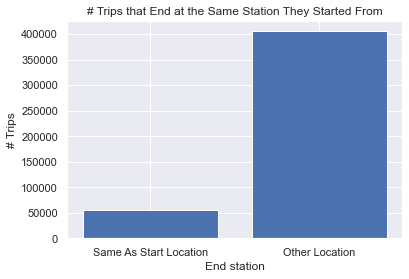

In [35]:
trips = (
    trip_history.groupby(['start_station_name', 'end_station_name'])['start_date']
    .count().to_frame().reset_index()
    .rename(columns={"start_date": "Trips"})
    .pivot(index='start_station_name', columns='end_station_name')
    .fillna(value=0)
)

#Ride Length
sns.displot(trip_history.loc[trip_history['total_duration']<(4*60*60),
                       'total_duration']/3600)
plt.xlabel('Ride Length (hrs)')
plt.ylabel('# Trips')
plt.title('Ride Length')
plt.show()

#Return Location

plt.bar([0, 1], 
        [np.trace(trips.values), 
         trips.values.sum()-np.trace(trips.values)],
        tick_label=['Same As Start Location', 'Other Location'])
plt.xlabel('End station')
plt.ylabel('# Trips')
plt.title('# Trips that End at the Same Station They Started From')
plt.show()


C:\Users\mango\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


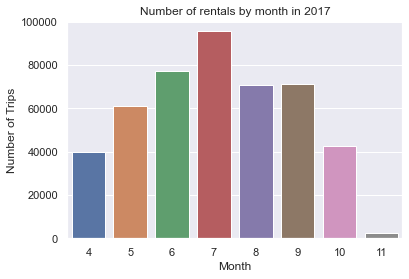

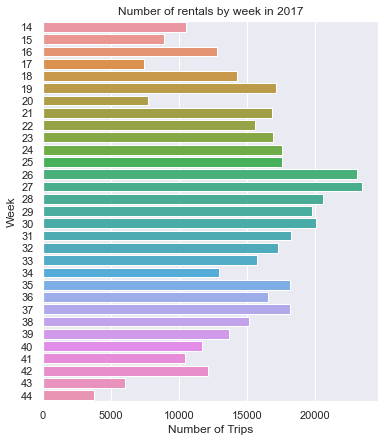

C:\Users\mango\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


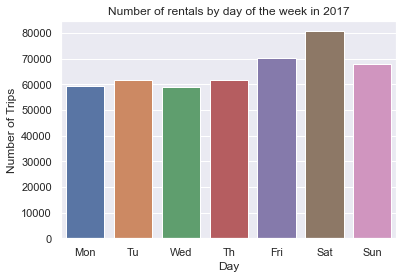

In [36]:
#change date from object to date datatype
for col in ['start_date', 'end_date']:
    trip_history[col] = pd.to_datetime(trip_history[col],
                                format='%m/%d/%Y')
    
# num rentals per month    
plt.figure()
sns.countplot(trip_history['start_date'].dt.month)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of rentals by month in 2017')
plt.show()

# num rentals per week 
plt.figure(figsize=(6, 7))
sns.countplot(y=trip_history['start_date'].dt.isocalendar().week)
plt.ylabel('Week')
plt.xlabel('Number of Trips')
plt.title('Number of rentals by week in 2017')
plt.show()

#num rentals per day of the week
plt.figure()
sns.countplot(trip_history['start_date'].dt.weekday)
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.title('Number of rentals by day of the week in 2017')
plt.xticks(np.arange(7),
           ['Mon', 'Tu', 'Wed', 'Th', 'Fri', 'Sat', 'Sun'])
plt.show()

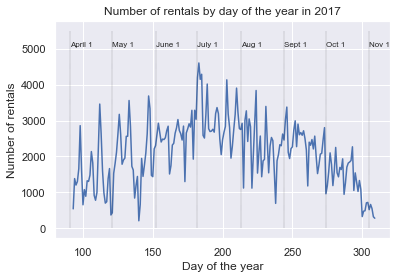

In [49]:
days = trip_history.groupby(trip_history['start_date'].dt.dayofyear)['start_date']
days.count().plot()
plt.xlabel('Day of the year')
plt.ylabel('Number of rentals')
plt.title('Number of rentals by day of the year in 2017')

month_first = [("April 1", 91),
            ("May 1", 121),
            ("June 1", 152),
            ("July 1", 182),
            ("Aug 1", 213),
            ("Sept 1", 244),
            ("Oct 1", 274),
            ("Nov 1", 305)]
for name, day in month_first:
    plt.plot([day,day], [0,5500], 
             'k--', linewidth=0.2)
    plt.text(day, 5200, name, fontsize=8, 
             va='top')

plt.show()


In [38]:
columns = inspector.get_columns('weather_data')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
code VARCHAR(40)
name VARCHAR(100)
date TEXT
precipitation REAL
max_temp REAL
min_temp REAL


In [41]:
# Query all weather data 
weather_info = session.query(
    weather_df.id,
    weather_df.code,
    weather_df.name,
    weather_df.date,
    weather_df.precipitation,
    weather_df.max_temp,
    weather_df.min_temp).all()

session.close()

#Convert query results to DataFranme
weather_information = pd.DataFrame(weather_info)
weather_information.head(5)
weather_information['date'] = pd.to_datetime(weather_information['date'])
weather_information.head(5)

,id,code,name,date,precipitation,max_temp,min_temp
0,1,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-01,0.00,26.0,18.0
1,2,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-02,0.00,31.0,20.0
2,3,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-03,0.01,30.0,25.0
3,4,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-04,0.00,25.0,-6.0
4,5,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-05,0.01,2.0,-8.0


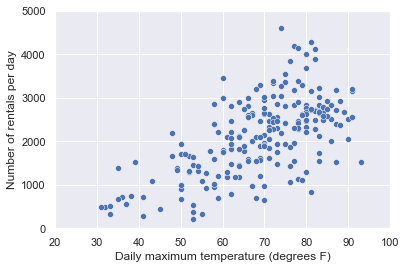

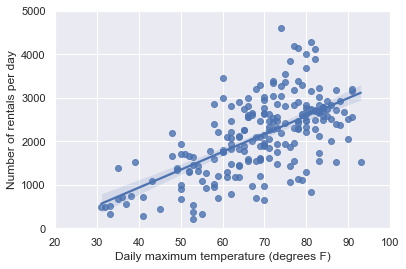

In [54]:
weather = pd.DataFrame(weather_info)
for col in ['date']:
    weather[col] = pd.to_datetime(weather[col],
                                format='%m/%d/%y')


trips_per_day = (
    trip_history
    .groupby(trip_history['start_date'].dt.dayofyear)
    .size()
    .rename('trips')
)

# Add the trips to weather table
weather['dayofyear'] = weather.date.dt.dayofyear
weather = (
    weather
    .set_index('dayofyear')
    .join(trips_per_day)
)

#max temp vs #trips per day
sns.scatterplot(x='max_temp', y='trips', data=weather)
plt.xlabel('Daily maximum temperature (degrees F)')
plt.ylabel('Number of rentals per day')
plt.xlim([20, 100])
plt.ylim([0, 5000])
plt.show()

#graph with regression
sns.regplot(x='max_temp', y='trips', data=weather)
plt.xlabel('Daily maximum temperature (degrees F)')
plt.ylabel('Number of rentals per day')
plt.xlim([20, 100])
plt.ylim([0, 5000])
plt.show()


In [ ]:
!jupyter nbconvert  saif.ipynb --to html